In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import measurements
from scipy.signal import convolve2d
from skimage.measure import perimeter
import scipy.io

In [3]:
def disk(r):
    x = np.arange(-r, r+1, 1)
    xx, yy = np.meshgrid(x,x)
    d = np.sqrt(xx**2 + yy**2)
    return d<=r

In [4]:
def pop_disks(nb_disks, S, Rmax):
    centers = np.random.randint(S, size =(nb_disks ,2) ) ;
    radii = Rmax * np.random.rand(nb_disks);
    N=1000;
    x = np. linspace (0, S, 1000)
    y = np. linspace (0, S, 1000)
    X, Y = np.meshgrid(x, y)
    I = np.zeros (( N,N))
    for i in range(nb_disks) :
        I2 = (X-centers [ i ,0]) **2 + (Y-centers [ i ,1]) ** 2 <= radii [ i ]**2
        I = np. logical_or ( I , I2)
    return I


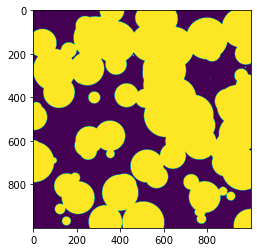

In [5]:
img = pop_disks(100, 1000, 100)
plt.imshow(img)

In [6]:
def probe_points(n_probes, image):
    count = 0
    for i in range(n_probes):
        rand_x, rand_y = list(np.random.randint(len(image), size=(2,1)))
        if image[rand_x, rand_y]:
            count += 1
    
    area = count/n_probes * (len(image)**2)
    
    
    print("count     :", count)
    print("area      :", area)
    print("real area :", measurements.sum(img))
    print("abs error :", abs(measurements.sum(img)-area))
    print("rel error :", (abs(measurements.sum(img)-area))/area)
    return count, area

In [7]:
probe_points(100000, img)

count     : 62581
area      : 625810.0
real area : 625798
abs error : 12.0
rel error : 1.9175149006887075e-05


(62581, 625810.0)

In [13]:
def probe_line(image):
    probe= np.zeros(image.shape)
    probe[20 : -20:10, 20:-20] = 1
    lines = image.astype(int)*probe
    h = np.array([[1, -1, 0]])
    points = convolve2d(lines, h, mode='same')
    
    #print(sum(abs(points)))

In [14]:
probe_line(img)

### 8.2

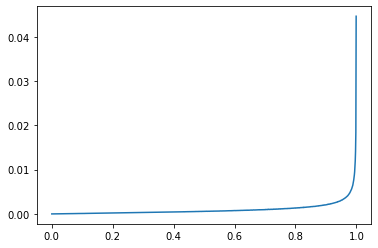

In [15]:
R = 1

n_bins = 1000
N = int(1e7)

d = R*np.random.rand(N, 1)
chords = np.sqrt(R**2 - d**2) 
hist = np.histogram(chords, bins=n_bins)
plt.plot(hist[1][:-1], hist[0]/N)

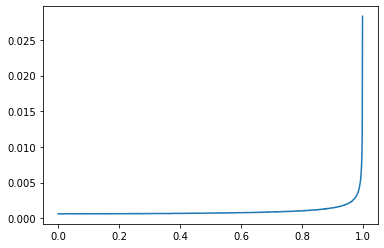

In [16]:
theta = np.pi*2*np.random.rand(N,2)
dX, dY = np.diff(R*np.cos(theta)), np.diff(R*np.sin(theta))

chords2 = 1./2 * np.sqrt(dX**2 + dY**2)
hist2 = np.histogram(chords2, bins=n_bins)
plt.plot(hist2[1][:-1], hist2[0]/N)

In [18]:
# analytical values
step = .05
r2 = np.arange(0, R, step)
probaReal = 1./R * r2 / np.sqrt(R**2-r2**2)
probaReal = probaReal * R / n_bins  # approximation of the integral


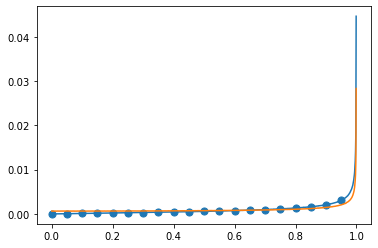

In [20]:
plt.figure()
plt.plot(hist[1][:-1], hist[0]/N)
plt.plot(hist2[1][:-1], hist2[0]/N)
plt.scatter(r2, probaReal, 50)

### 8.3

In [ ]:
def dot_arrays(A, B, ax=1):
    return np.sum(A.conj()*B, axis=ax)


